In [14]:
from metpy.plots import SkewT
from metpy.units import units
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
import numpy as np

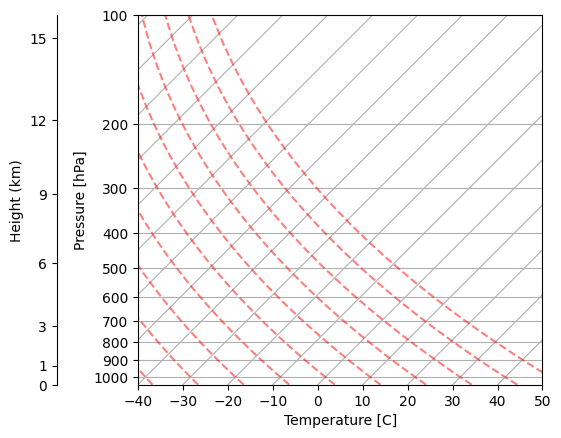

In [11]:
fig = plt.figure()
skew = SkewT(fig, rotation=45)
skew.plot_dry_adiabats()
skew.ax.set_xlabel('Temperature [C]')
skew.ax.set_ylabel('Pressure [hPa]')

secax = skew.ax.secondary_yaxis(-0.2,
    functions=(
        lambda p: mpcalc.pressure_to_height_std(units.Quantity(p, 'hPa')).m_as('km'),
        lambda h: mpcalc.height_to_pressure_std(units.Quantity(h, 'km')).m
    )
)
secax.yaxis.set_major_locator(plt.FixedLocator([0, 1, 3, 6, 9, 12, 15]))
secax.yaxis.set_minor_locator(plt.NullLocator())
secax.yaxis.set_major_formatter(plt.ScalarFormatter())
secax.set_ylabel('Height (km)')
plt.savefig('Exercises/Figures/skew-t-dry.pdf',bbox_inches='tight')

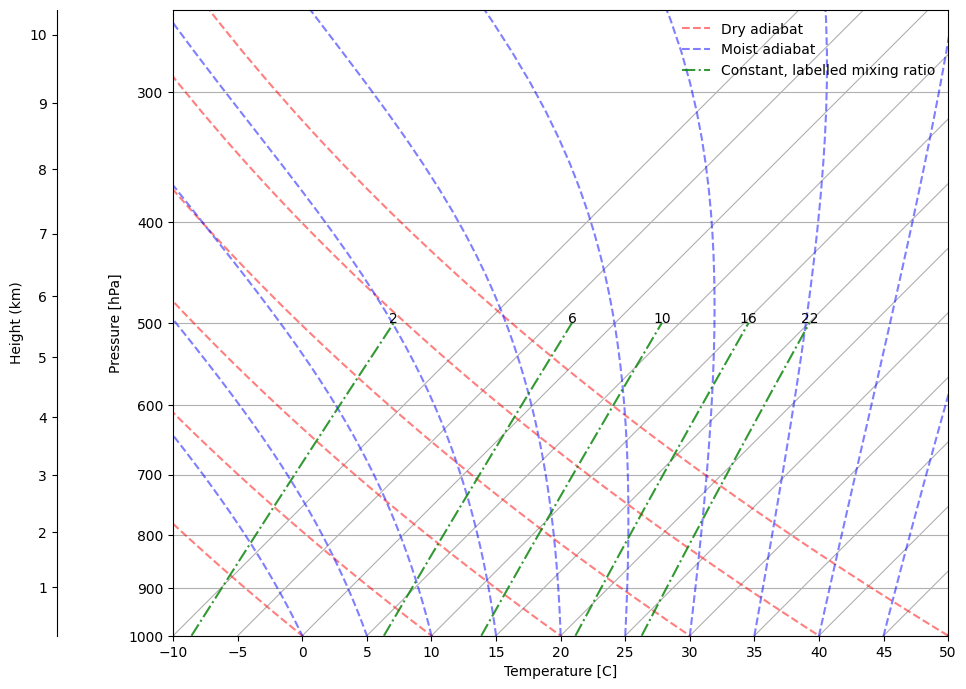

In [46]:
fig = plt.figure()
skew = SkewT(fig, rotation=45)
skew.plot_dry_adiabats(label='Dry adiabat')
skew.plot_moist_adiabats(label='Moist adiabat')
skew.ax.set_xlabel('Temperature [C]')
skew.ax.set_ylabel('Pressure [hPa]')
skew.ax.set_ylim(1000, 250)
skew.ax.set_xlim(-10, 50)

skew.ax.set_xticks(np.arange(-10,55,5))
secax = skew.ax.secondary_yaxis(-0.15,
    functions=(
        lambda p: mpcalc.pressure_to_height_std(units.Quantity(p, 'hPa')).m_as('km'),
        lambda h: mpcalc.height_to_pressure_std(units.Quantity(h, 'km')).m
    )
)
secax.yaxis.set_major_locator(plt.FixedLocator(np.arange(0,11,1)))
secax.yaxis.set_minor_locator(plt.NullLocator())
secax.yaxis.set_major_formatter(plt.ScalarFormatter())
secax.set_ylabel('Height (km)')

w = np.array([0.022, 0.016, 0.01, 0.006, 0.002])[:, None] * units('g/g')
p = units.hPa * np.linspace(1000, 500, 7)
skew.plot_mixing_lines(mixing_ratio=w, pressure=p, color='darkseagreen', linestyle='-.', label='Constant, labelled mixing ratio')

# Label
for val in w.flatten():
    top_p = p[-1]
    dewpt = mpcalc.dewpoint(mpcalc.vapor_pressure(top_p, val))
    skew.ax.text(dewpt, top_p, str(int(val.to('g/kg').m)),
                 horizontalalignment='center')
skew.ax.legend(frameon=False)
fig.set_size_inches(10,10)
plt.savefig('Exercises/Figures/skew-t-moist.pdf',bbox_inches='tight')